In [1]:
# conda activate movie-recommender          # activate environment in terminal         
# jupyter notebook                     # start server + kernel inside my-conda-env

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
chunksize=100000
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
# Custom date parser function
date_parser = lambda x: pd.to_datetime(x, unit='s')

# ratings
ratings = pd.DataFrame()  # initialize an empty dataframe
for index, chunk in enumerate(pd.read_csv('../samples/random_10th_user_ratings.csv',
                         dtype={'userId': str, 'movieId': str, "rating": float, 'timestamp': int},
                         chunksize=chunksize,
                         parse_dates=['timestamp'],
                         date_parser=date_parser
                         )):
    # Perform operations on the chunk
    # processed_chunk = chunk[chunk['column_name'] > 0]  # Example operation
    ratings = pd.concat([ratings, chunk])
    print(f"Chunk {index} loaded")
print("Ratings dataset loaded")

/var/folders/55/xtgthnr12lz2b2j6l0pqj7zm0459s6/T/ipykernel_24386/3815746469.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  for index, chunk in enumerate(pd.read_csv('../samples/random_10th_user_ratings.csv',


Chunk 0 loaded
Chunk 1 loaded
Chunk 2 loaded
Chunk 3 loaded
Chunk 4 loaded
Chunk 5 loaded
Chunk 6 loaded
Chunk 7 loaded
Chunk 8 loaded
Chunk 9 loaded
Chunk 10 loaded
Chunk 11 loaded
Chunk 12 loaded
Chunk 13 loaded
Chunk 14 loaded
Chunk 15 loaded
Chunk 16 loaded
Chunk 17 loaded
Chunk 18 loaded
Chunk 19 loaded
Ratings dataset loaded


In [5]:
print(ratings.head(10))

  userId movieId  rating           timestamp
0      1       2     3.5 2005-04-02 23:53:47
1      1      29     3.5 2005-04-02 23:31:16
2      1      32     3.5 2005-04-02 23:33:39
3      1      47     3.5 2005-04-02 23:32:07
4      1      50     3.5 2005-04-02 23:29:40
5      1     112     3.5 2004-09-10 03:09:00
6      1     151     4.0 2004-09-10 03:08:54
7      1     223     4.0 2005-04-02 23:46:13
8      1     253     4.0 2005-04-02 23:35:40
9      1     260     4.0 2005-04-02 23:33:46


Now the time is fixed, I can use this approach going forward

In [6]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982131 entries, 0 to 1982130
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     object        
 1   movieId    object        
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 60.5+ MB
None


Sampled Ratings dataset has 1,982,131 entries. 4 columns considting of 

0   userId     object / string        
1   movieId    object / string        
2   rating     float64       
3   timestamp  datetime64[ns]

Now we will look at the summarty statistics of the dataset

In [7]:
# Set the float format to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
print(ratings.describe())
# Reset to default float format
pd.reset_option('display.float_format')

          rating                      timestamp
count 1982131.00                        1982131
mean        3.53  2004-12-03 21:52:11.056621312
min         0.50            1995-01-09 11:46:44
25%         3.00     2000-08-18 21:38:59.500000
50%         3.50            2005-01-31 04:14:03
75%         4.00            2008-12-01 01:00:42
max         5.00            2015-03-31 06:11:28
std         1.05                            NaN


We get a summary statisics of the table rating and timestamp columns. For ratings, the mean value is 3.5, the lower quartile 3, and the upper quartile is 4. Lets make a plot of this to explore it more.

I will use the seaborn plot library for this.

First, I will create a histogram to see the distribution of the ratings 

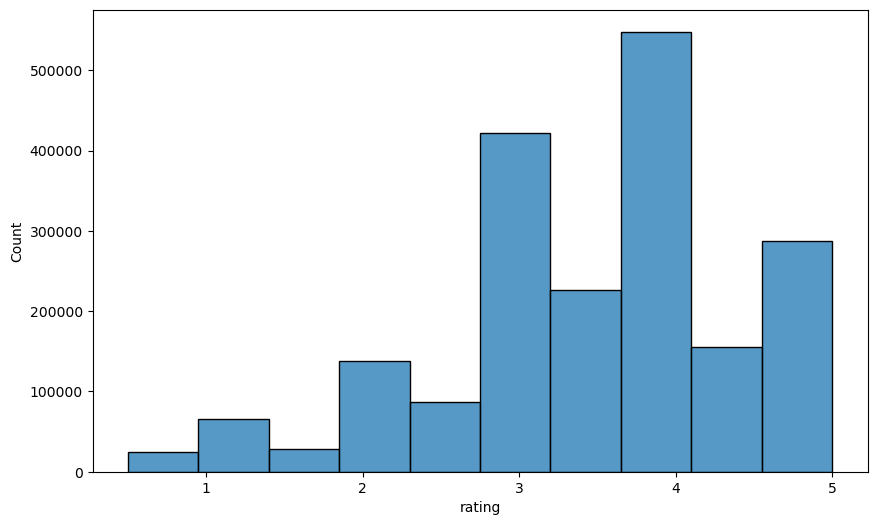

In [20]:
plt.figure(figsize=(10, 6))
# Create a histogram for rating
sns.histplot(data=ratings, x='rating', bins=10)
plt.show()

The histogram could be improved upon, first I would like to see how many unique ratings there are

In [16]:
unique_values = ratings['rating'].unique().tolist()

print(sorted(unique_values))

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


the ratings values can be either a whole or half unit from 0.5 up to 5 

In [9]:
# Create the count table
count_table = ratings['rating'].value_counts().reset_index()
count_table.columns = ['rating', 'count']

total = count_table["count"].sum()
count_table["percentage"] = round((count_table["count"]/total)*100, 0)
count_table = count_table.sort_values(by="rating")
# Print the count table
print(count_table)


   rating   count  percentage
9     0.5   24488         1.0
7     1.0   66088         3.0
8     1.5   28147         1.0
5     2.0  137993         7.0
6     2.5   87323         4.0
1     3.0  421425        21.0
3     3.5  225823        11.0
0     4.0  547921        28.0
4     4.5  155069         8.0
2     5.0  287854        15.0


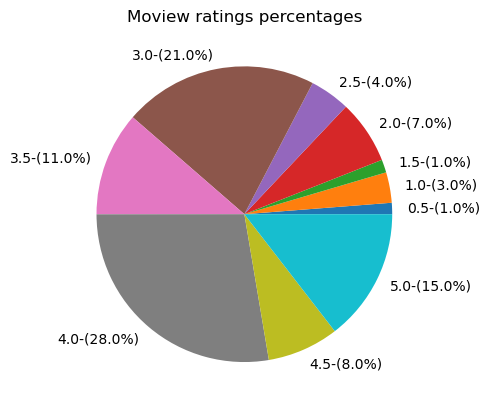

In [21]:
# Choose a Seaborn color palette
# colors = sns.color_palette('pastel')[0:4]
labels = [f"{rating}-({percentage}%)" for rating, percentage in zip(count_table["rating"], count_table["percentage"])]
# Create the pie chart
plt.pie(count_table['count'], labels=labels, 
        # colors=colors, autopct='%.0f%%'
        )
plt.title('Movie ratings percentages')
plt.show()

This looks intesting, we get a complete understanding of the data distribution. We can see that 4, 3 and 5 are the most common ratings.

The .5 incremenets are strange, why are the incremenets so low? Lets see the distribution of increments across time

/var/folders/55/xtgthnr12lz2b2j6l0pqj7zm0459s6/T/ipykernel_24386/1663752065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incremental_ratings['year'] = incremental_ratings['timestamp'].dt.year
/var/folders/55/xtgthnr12lz2b2j6l0pqj7zm0459s6/T/ipykernel_24386/1663752065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_incremental_ratings['year'] = non_incremental_ratings['timestamp'].dt.year


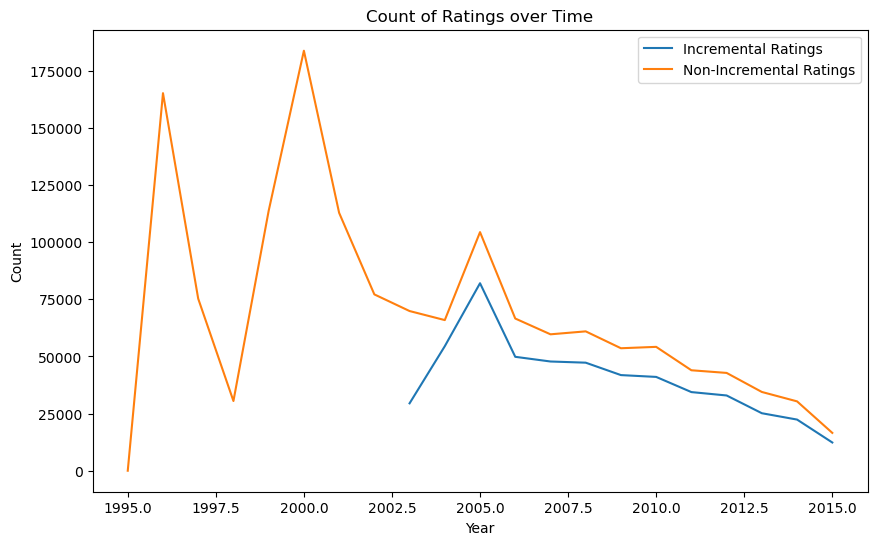

In [35]:
# Create a dataframe for incremental ratings
incremental_ratings = ratings[ratings['rating'].isin([0.5, 1.5, 2.5, 3.5, 4.5])]
incremental_ratings['year'] = incremental_ratings['timestamp'].dt.year
# Create a dataframe for non-incremental ratings
non_incremental_ratings = ratings[ratings['rating'].isin([1, 2, 3, 4, 5])]
non_incremental_ratings['year'] = non_incremental_ratings['timestamp'].dt.year
# Group by year and count the number of ratings for each type
incremental_ratings_count = incremental_ratings.groupby('year')['rating'].count()
non_incremental_ratings_count = non_incremental_ratings.groupby('year')['rating'].count()

# Plot the count of ratings over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=incremental_ratings_count.index, y=incremental_ratings_count.values, label='Incremental Ratings')
sns.lineplot(x=non_incremental_ratings_count.index, y=non_incremental_ratings_count.values, label='Non-Incremental Ratings')
plt.title('Count of Ratings over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

This shows the incremental ratings start around 2002 and generally reflect the same distibution as the non-incremental ratings.

Based on this evidence it makes sense to remove the incremenetal ratings as these will complicate the analysis.

In [38]:
ratings.info()

ratings = non_incremental_ratings

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982131 entries, 0 to 1982130
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     object        
 1   movieId    object        
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 60.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1461281 entries, 6 to 1982129
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   userId     1461281 non-null  object        
 1   movieId    1461281 non-null  object        
 2   rating     1461281 non-null  float64       
 3   timestamp  1461281 non-null  datetime64[ns]
 4   year       1461281 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 61.3+ MB


By removing the incremental rating we have removed over 400k ratings

old code below

In [39]:
n_unique_users = ratings['userId'].nunique()
 
user_count = ratings.groupby('userId').size().reset_index(name='count')
# user_count["percentage"] = round((user_count["count"]/user_count["count"].sum())*100, 2)
user_count["percentage"] = (user_count["count"]/total)*100

user_count = user_count.sort_values(by="count", ascending=False)
# pc = int(len(user_count) * 0.01)
# top_raters = user_count[user_count["count"]>2000]
# print(len(top_raters))
# print(top_raters["percentage"].sum())

# print(top_1000.sort_values(by="percentage", ascending=False))

print("total size of unique users ratings")
print(user_count.size)
print("description of unique users ratings")
print(user_count["count"].describe())
print("The top rating provider")
print(user_count.head(1))


total size of unique users ratings
41547
description of unique users ratings
count    13849.000000
mean       105.515272
std        152.935021
min          1.000000
25%         28.000000
50%         54.000000
75%        115.000000
max       2532.000000
Name: count, dtype: float64
The top rating provider
     userId  count  percentage
325  103223   2532    0.127741


(array([6.548e+03, 2.380e+03, 1.289e+03, 8.240e+02, 5.920e+02, 4.030e+02,
        3.200e+02, 2.130e+02, 1.800e+02, 1.510e+02, 1.230e+02, 9.600e+01,
        9.700e+01, 7.200e+01, 6.100e+01, 6.400e+01, 3.700e+01, 4.400e+01,
        4.200e+01, 3.100e+01, 3.100e+01, 2.300e+01, 2.700e+01, 1.700e+01,
        1.800e+01, 2.200e+01, 1.500e+01, 1.400e+01, 9.000e+00, 1.200e+01,
        1.100e+01, 9.000e+00, 4.000e+00, 1.000e+01, 4.000e+00, 4.000e+00,
        4.000e+00, 7.000e+00, 5.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

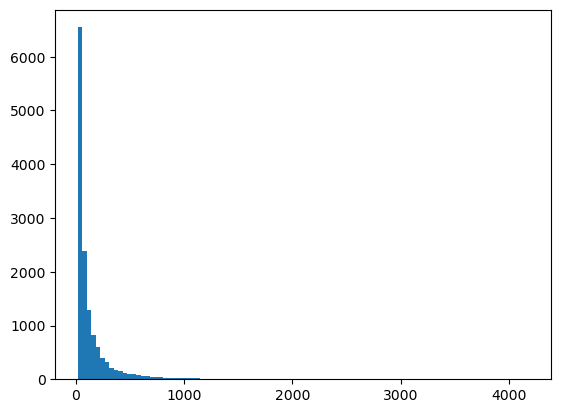

In [13]:
plt.hist(user_count["count"], bins=100 )


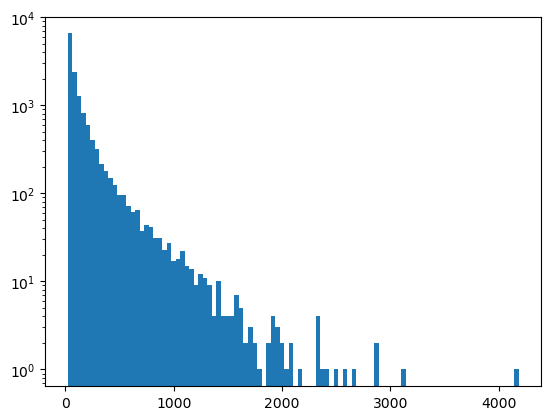

In [14]:
plt.hist(user_count["count"], bins=100 )
plt.yscale("log")

<Axes: >

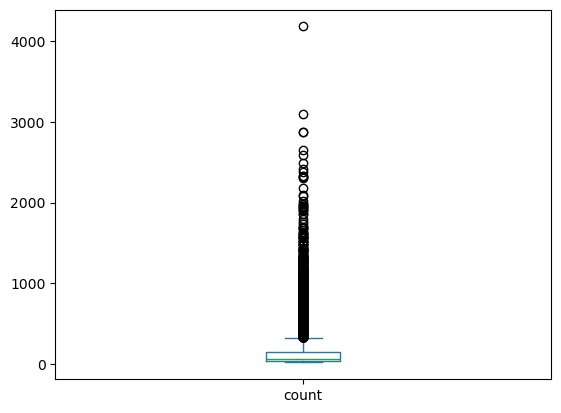

In [15]:
user_count["count"].plot.box()
# make another box plot focusing 

Its clear to see there are some outlyer users who provider a dispraportionate amount of reviews. The top rating provider is user 20231 with 9245 ratings has provided 0.04 of all the ratings in the dataset. this leads me to want to know how many of the all the movies has this user rated? 

In [16]:

n_unique_movies = ratings['movieId'].nunique()
print(f"total unique movies= {n_unique_movies}")
print(f"total unique users= {n_unique_users}")

total unique movies= 17403
total unique users= 13849


I know would like to know about the movies people are rating:
- what is the most rated movie?
- what is the least?
- is any movie not rated? 

In [17]:
movie_count = ratings.groupby('movieId').size().reset_index(name='count')
movie_count["percentage"] = (movie_count["count"]/total)*100

movie_count = movie_count.sort_values(by="count", ascending=False)
print(movie_count.describe())
print("the most rated movie is")
print(movie_count.head(1))
print("the least rated movie is")
print(movie_count.tail(1))

              count    percentage
count  17403.000000  17403.000000
mean     113.895937      0.005746
std      375.605581      0.018950
min        1.000000      0.000050
25%        2.000000      0.000101
50%        9.000000      0.000454
75%       53.000000      0.002674
max     6746.000000      0.340341
the most rated movie is
     movieId  count  percentage
4715     296   6746    0.340341
the least rated movie is
      movieId  count  percentage
10097    5851      1     0.00005


              count    percentage
count  13540.000000  13540.000000
mean      67.531315      0.003377
std       43.696630      0.002185
min       35.000000      0.001750
25%       42.000000      0.002100
50%       53.000000      0.002650
75%       77.000000      0.003850
max      956.000000      0.047799


(array([4.356e+03, 2.462e+03, 1.690e+03, 1.158e+03, 8.760e+02, 6.070e+02,
        4.600e+02, 3.670e+02, 3.180e+02, 2.710e+02, 1.740e+02, 1.530e+02,
        1.010e+02, 8.200e+01, 8.900e+01, 4.800e+01, 3.600e+01, 2.700e+01,
        4.500e+01, 4.100e+01, 2.600e+01, 1.700e+01, 1.200e+01, 1.700e+01,
        9.000e+00, 1.500e+01, 1.000e+01, 6.000e+00, 1.200e+01, 5.000e+00,
        5.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

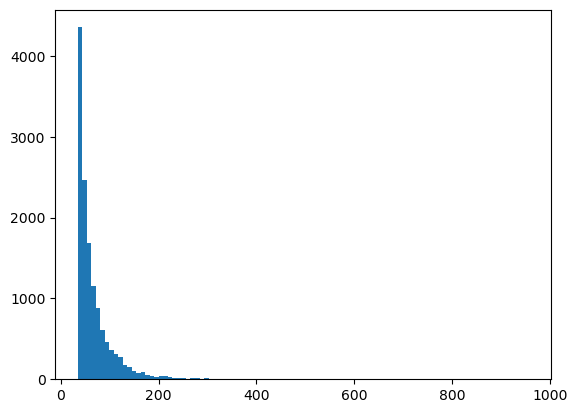

In [45]:
Q1 = user_count['count'].quantile(0.25)
Q3 = user_count['count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = user_count[((user_count['count'] < lower_bound) | (user_count['count'] > upper_bound))]
# print(outliers)
# outliers['count'].plot.hist()
# print(Q1)
# print(lower_bound)
# print(upper_bound)
# print(IQR)
print(outliers.describe())
plt.hist(outliers["count"], bins=100)

Majority of user have set ratings for less than 200 movies 

In [46]:
ratings_minus_outlier_users = ratings[~ratings["userId"].isin(outliers["userId"])]

users_count_2 = ratings_minus_outlier_users.groupby('userId').size().reset_index(name='count')

# print(f"dataset count with outlyer rating providers removed {ratings_minus_outlier_users.size}")
# print(f"amount of unique users with outlyer rating providers removed {users_count_2.size}")
users_count_2.describe()
# Generate descriptive statistics
desc1 = user_count["count"].describe()
desc2 = users_count_2.describe()

# Combine the results into a single table
combined_desc = pd.concat([desc1, desc2], axis=1)
combined_desc.columns = ['Ratings ', 'Minus Outlier Users Subset']
print(combined_desc)

            Ratings   Minus Outlier Users Subset
count  135633.000000               122093.000000
mean       14.745866                    8.892009
std        23.504810                    7.664234
min         1.000000                    1.000000
25%         4.000000                    3.000000
50%         7.000000                    6.000000
75%        16.000000                   12.000000
max       956.000000                   34.000000


In [49]:
user_count.describe()

,count,percentage
count,135633.000000,135633.000000
mean,14.745866,0.000737
std,23.504810,0.001175
min,1.000000,0.000050
25%,4.000000,0.000200
50%,7.000000,0.000350
75%,16.000000,0.000800
max,956.000000,0.047799


(array([45550., 24944., 14853., 12784.,  6443.,  4831.,  4965.,  2777.,
         2433.,  2513.]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <BarContainer object of 10 artists>)

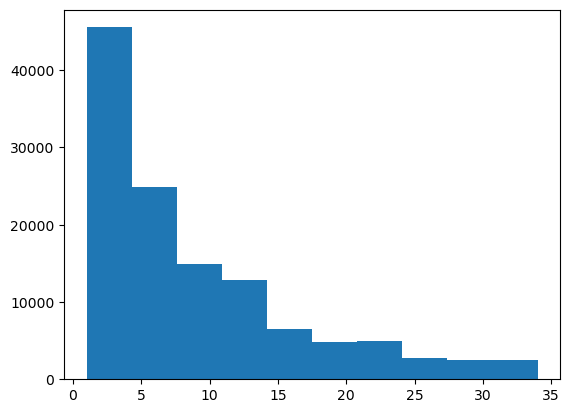

In [47]:
plt.hist(users_count_2["count"], bins=10 )

<Axes: >

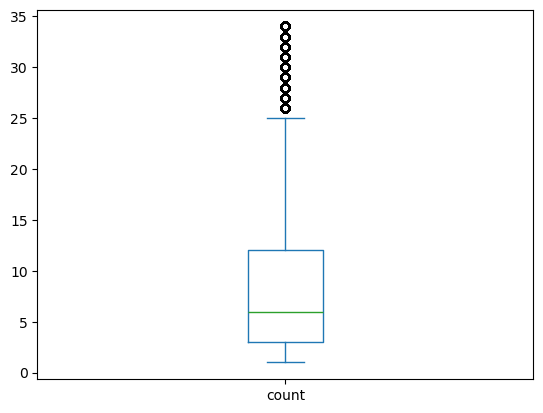

In [48]:

users_count_2["count"].plot.box()

Next lets look the at timestamp variable

               count  percentage
count       4.000000    4.000000
mean   500006.500000   25.000000
std     19910.391433    0.995507
min    480770.000000   24.038188
25%    486766.250000   24.337996
50%    496662.000000   24.832777
75%    509902.250000   25.494781
max    525932.000000   26.296258
the season when most ratings happen
   season   count  percentage
3  Winter  525932   26.296258
the season when least ratings happen
   season   count  percentage
1  Spring  480770   24.038188


<Axes: ylabel='percentage'>

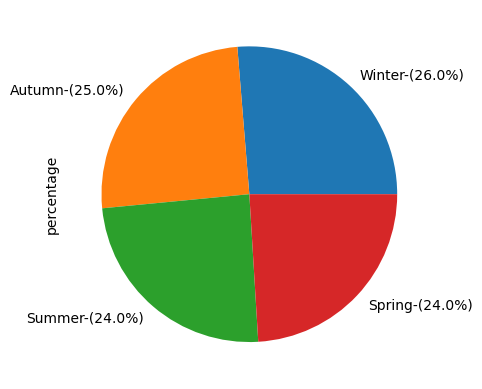

In [50]:
# print(ratings["timestamp"].describe())

ratings["year"] = ratings["timestamp"].dt.year
ratings["month"] = ratings["timestamp"].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

ratings["season"] = ratings["timestamp"].dt.month.apply(get_season)
# print(ratings)

season_count = ratings.groupby(["season"]).size().reset_index(name='count')
# user_count["percentage"] = round((user_count["count"]/user_count["count"].sum())*100, 2)
season_count["percentage"] = (season_count["count"]/total)*100

season_count = season_count.sort_values(by="count", ascending=False)
print(season_count.describe())
print("the season when most ratings happen")
print(season_count.head(1))
print("the season when least ratings happen")
print(season_count.tail(1))
labels = [f"{season}-({round(percentage, 0)}%)" for season, percentage in zip(season_count["season"], season_count["percentage"])]
season_count["percentage"].plot.pie(labels=labels)

     year  season  month  count
0    1995  Winter      1      1
1    1996  Autumn      9  15032
2    1996  Autumn     10  19132
3    1996  Autumn     11  18404
4    1996  Spring      3    867
..    ...     ...    ...    ...
226  2014  Winter      2   4359
227  2014  Winter     12   7844
228  2015  Spring      3   8802
229  2015  Winter      1  10989
230  2015  Winter      2   8826

[231 rows x 4 columns]


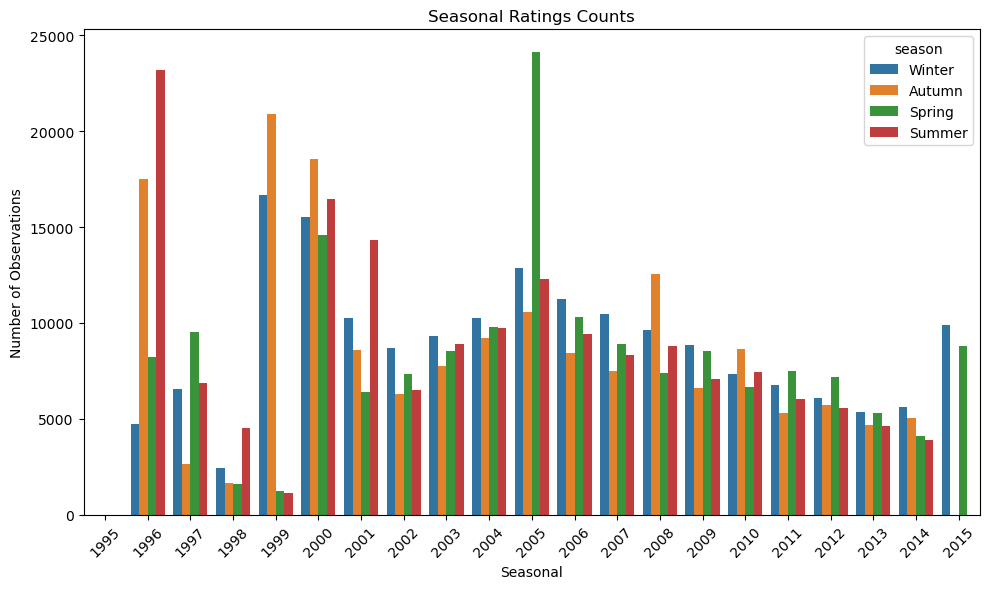

In [51]:


# monthly_counts['year'] = monthly_counts['timestamp'].dt.year-1990
seasonal_counts = ratings.groupby(["year", 'season', "month"]).size().reset_index(name='count')
print(seasonal_counts)
# Plotting the bar chart with seaborn
plt.figure(figsize=(10, 6))
sns.color_palette("hls", 8)
# barblot
sns.barplot(x='year', y='count', hue='season', data=seasonal_counts, errorbar=None)
# cat plot
# sns.catplot( data=seasonal_counts,x='year', y='count', hue='season',kind="bar")
# sns.displot(
#     seasonal_counts, x="count", col="year", hue="season"
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )
plt.title('Seasonal Ratings Counts')
plt.xlabel('Seasonal')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What was the reason for the spike in Spring 2005? 

In [54]:
spring_2005 = ratings.loc[(ratings['year'] == 2005) & (ratings['season'] == 'Spring')]
spring_2005.info()
spring_2005.describe()
spring_2005.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 72318 entries, 37 to 2000018
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   userId     72318 non-null  object        
 1   movieId    72318 non-null  object        
 2   rating     72318 non-null  float64       
 3   timestamp  72318 non-null  datetime64[ns]
 4   year       72318 non-null  int32         
 5   month      72318 non-null  int32         
 6   season     72318 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(3)
memory usage: 3.9+ MB


userId        5713
movieId       5287
rating          10
timestamp    70719
year             1
month            3
season           1
dtype: int64

In [55]:
# movies_spring_2005 = spring_2005.groupby("movieId").agg("count")
movies_spring_2005 = spring_2005.groupby("movieId").size().reset_index(name="count").sort_values(by="count", ascending=False)
movies_spring_2005

,movieId,count
2624,4306,239
3706,5952,228
1179,2571,220
3115,4993,206
4447,7153,201
...,...,...
3682,5901,1
1401,2785,1
1403,27851,1
3678,5898,1


In [62]:
spring_2005.groupby("movieId")

/var/folders/55/xtgthnr12lz2b2j6l0pqj7zm0459s6/T/ipykernel_14901/1040965796.py:1: FutureWarning: The provided callable <function mean at 0x105d17130> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  spring_2005.groupby("movieId").agg([np.mean])


TypeError: agg function failed [how->mean,dtype->object]

there are too many movies to expore them. I need some other way of grouping the movies. I will look at using the tags to group and sperate the movies